#### Katrina Johnson - DSB Unit 3.1.5

## Challenge: Model Comparison

Let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

## My Steps for Completing DSB Unit 2.5.2 Challenge

1. Download two datasets.  
2. Run the predicitve model I created in challenge 2.3.3 on both data sets.   
3. Evaluate the results to find out how consistently the predictive model works.
4. Use error calculating mechanism I created to test the sentiment or span in the naive bayes' lessons to text for accuracy.
5. Use the methods I learned in DSB Unit 5.1 to calculate the CI, R^2, pvalue, and Intercept and coefficients.
6. Analyze the results of the calculations made in step 5, and write about them, and write about how to address any apparent problems that I notice.

training a model means using sklearn's fit() method.  
I will need X and a Y variables
X is every feature that I want to go into the model that is not the outcome feature.  For example, if I am predicting property crime, I kick property crime out of X and make property crime Y.

Then instantiate my linear regression model.  Next, I do the fit(X, Y).  This creates a linear regression model.
Afterwards, I can call the following methods on the model: score(X,Y) or a predict(X) 

If I use Y_pred = NameIGiveTheRegressionModel.predict(X)
Now, I can compare Y_pred to Y.  This will tell me the residual of the model against each data point.  (i.e. the residual is the distance between each data point and the line. There is one residual for each data point.  This is why I can plot the residual on the Y axis and also on the X axis.)

To eveluate how good a model is at dealing with new data, do not refit the model.  Why?  Because if you do, it will be a different model.

Take my Oregon crime statistic data, make sure it has the same number of features, and in the same order as the New York crime statistic data.  This is because the model ignores column titles.  It only looks at the order in which they appear in the data set.

For Oregon_df
X1 = all features I choose to use, except Property Crime.
Y1 = Property crime.

For df  ..which is the NY data - I have aleady done this:
X = all features I choose to use, except Property Crime.  Y = Property crime. (I could call these X_train...and Y_train)

Once I do everything to X1 and Y1 that I did to the NewYork X and Y, and run (i.e. plug them into) the same model as the variable that will be fit, ...Then I can compare them using score(X,Y) and predict (Y) and score(X1, Y1) and predict(X1).

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import quantile_transform
from sklearn import preprocessing
import statsmodels.formula.api as smf
from scipy import stats
from array import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import paired_distances
from sklearn import neighbors

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#plt.style.use('dark_background')

In [3]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
#df

In [4]:
Oregon_df = pd.read_excel('table_8_offenses_known_to_law_enforcement_oregon_by_city_2013.xls')
#Oregon_df

In [5]:
df.columns = ['City', 'Population', 'Violent crime', 'Murder and nonnegligent manslaughter', 
              'Rape (revised definition) 1', 'Rape (legacy definition) 2', 'Robbery', 'Aggravated assault', 
              'Property crime', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Arson 3']

#df


In [6]:
Oregon_df.columns = ['City', 'Population', 'Violent crime', 'Murder and nonnegligent manslaughter', 
                     'Rape (revised definition) 1','Rape (legacy definition) 2', 'Robbery', 'Aggravated assault',
                     'Property crime', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Arson']
#Oregon_df                                                      

In [7]:
df = df.drop(0)
df = df.drop(1)
df = df.drop(2)
df = df.drop(3)
df = df.drop(columns = ['City', 'Rape (revised definition) 1', 'Rape (legacy definition) 2', 'Arson 3'])
df = df.drop(352)
df = df.drop(353)
df = df.drop(354)

#This line had values that were extreemly high, and causing heteroscedasity. 
#Helpful Method of Detection: Scatter Plot
df = df.drop(220)



#df.replace({'A': {0: 100, 4: 400}})

#df

In [8]:
Oregon_df = Oregon_df.drop(0)
Oregon_df = Oregon_df.drop(1)
Oregon_df = Oregon_df.drop(2)
Oregon_df = Oregon_df.drop(3)
Oregon_df = Oregon_df.drop(columns = ['City', 'Rape (revised definition) 1', 'Rape (legacy definition) 2', 'Arson'])
Oregon_df = Oregon_df.drop(113)
Oregon_df = Oregon_df.drop(114)
Oregon_df = Oregon_df.dropna(how='all')
#Oregon_df

In [9]:
Oregon_df.isna().sum()

Population                              2
Violent crime                           0
Murder and nonnegligent manslaughter    0
Robbery                                 0
Aggravated assault                      0
Property crime                          0
Burglary                                0
Larceny theft                           0
Motor vehicle theft                     0
dtype: int64

In [10]:
df.isna().sum()

Population                              0
Violent crime                           0
Murder and nonnegligent manslaughter    0
Robbery                                 0
Aggravated assault                      0
Property crime                          0
Burglary                                0
Larceny theft                           0
Motor vehicle theft                     0
dtype: int64

In [11]:
Oregon_df['Population']

4       51645
5        1624
6       20455
7        9543
8        1144
9        3738
10       9660
11       3039
12       1862
13      93551
14      79926
15        NaN
16       3369
17       6313
18       2706
19      16031
20       1692
21       2022
22      17485
23       1726
24       1043
25       1938
26        722
27      15816
28       3826
29      12231
30      55218
31       9795
32      14803
33       8669
        ...  
83       9161
84       1887
85      27153
86       1313
87       2173
88     158234
89       6677
90       6475
91      18932
92       9380
93      60024
94       2058
95       7733
96      12917
97        NaN
98       9035
99       6191
100     13831
101     50311
102      4932
103      3461
104     16566
105     26925
106      1896
107      7040
108      5146
109     25744
110     20819
111     24263
112      1040
Name: Population, Length: 109, dtype: object

In [12]:
df.isna().sum()


Population                              0
Violent crime                           0
Murder and nonnegligent manslaughter    0
Robbery                                 0
Aggravated assault                      0
Property crime                          0
Burglary                                0
Larceny theft                           0
Motor vehicle theft                     0
dtype: int64

In [13]:
Oregon_df.isna().sum()

Population                              2
Violent crime                           0
Murder and nonnegligent manslaughter    0
Robbery                                 0
Aggravated assault                      0
Property crime                          0
Burglary                                0
Larceny theft                           0
Motor vehicle theft                     0
dtype: int64

In [14]:
Oregon_df = Oregon_df.dropna()
#Oregon_df['Population']

In [15]:
Oregon_df.isna().sum()

Population                              0
Violent crime                           0
Murder and nonnegligent manslaughter    0
Robbery                                 0
Aggravated assault                      0
Property crime                          0
Burglary                                0
Larceny theft                           0
Motor vehicle theft                     0
dtype: int64

Oregon_corr = Oregon_df.corr()
sns.heatmap(Oregon_corr, xticklabels=Oregon_corr.columns.values,
           yticklabels=corr.columns.values)

#Example: df.drop(columns=['B', 'C'])

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values)   

### Normalize for population then create scatter plots.

In [16]:
df['Property crime rate'] = df['Property crime'] / df['Population'] * 10000
df['Murder and nonnegligent manslaughter rate'] = df['Murder and nonnegligent manslaughter'] / df['Population'] * 100000
df['Robbery rate'] = df['Robbery'] / df['Population'] * 10000
df['Aggravated assult rate'] = df['Aggravated assault'] / df['Population'] * 10000
df['Burglary rate'] = df['Burglary'] / df['Population'] * 10000
df['Larceny theft rate'] = df['Larceny theft'] / df['Population'] * 10000
df['Motor vehicle theft rate'] = df['Motor vehicle theft'] / df['Population'] * 10000


In [17]:
Oregon_df['Property crime rate'] = Oregon_df['Property crime'] / Oregon_df['Population'] * 10000
Oregon_df['Murder and nonnegligent manslaughter rate'] = Oregon_df['Murder and nonnegligent manslaughter'] / Oregon_df['Population'] * 100000
Oregon_df['Robbery rate'] = Oregon_df['Robbery'] / Oregon_df['Population'] * 10000
Oregon_df['Aggravated assult rate'] = Oregon_df['Aggravated assault'] / Oregon_df['Population'] * 10000
Oregon_df['Burglary rate'] = Oregon_df['Burglary'] / Oregon_df['Population'] * 10000
Oregon_df['Larceny theft rate'] = Oregon_df['Larceny theft'] / Oregon_df['Population'] * 10000
Oregon_df['Motor vehicle theft rate'] = Oregon_df['Motor vehicle theft'] / Oregon_df['Population'] * 10000


In [18]:
df = df.loc[df['Property crime rate'] < 800]

Murder and nonnegligent manslaughter rate std:  7.106624843262038
Murder and nonnegligent manslaughter rate mean:  3.711138544263213


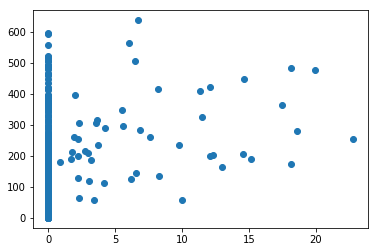

In [19]:
plt.scatter( df['Murder and nonnegligent manslaughter rate'], df['Property crime rate'])
plt.show

print('Murder and nonnegligent manslaughter rate std: ', df['Robbery rate'].std())

print('Murder and nonnegligent manslaughter rate mean: ', df['Robbery rate'].mean())


Robbery rate std:  7.106624843262038
Robbery rate mean:  3.711138544263213


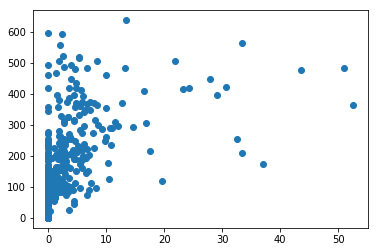

In [20]:
plt.scatter( df['Robbery rate'], df['Property crime rate'])
plt.show

print('Robbery rate std: ', df['Robbery rate'].std())

print('Robbery rate mean: ', df['Robbery rate'].mean())


<function matplotlib.pyplot.show(*args, **kw)>

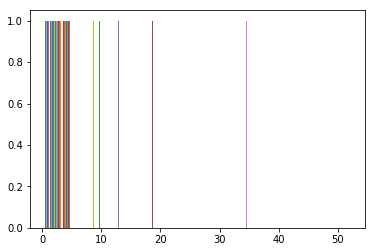

In [21]:
plt.hist(df['Robbery rate'])
plt.show

df_Robbery_outlier = df.loc[(df['Robbery'] == 19170)]
df_Robbery_outlier 

Burglary rate std:  28.031775147209085
Burglary rate mean:  31.556769330443355


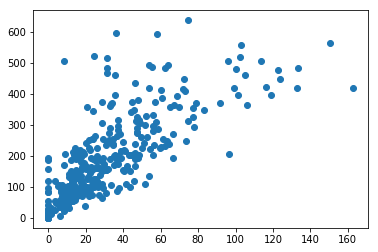

In [22]:
plt.scatter(df['Burglary rate'], df['Property crime rate'])
plt.show

print('Burglary rate std: ', df['Burglary rate'].std())

print('Burglary rate mean: ', df['Burglary rate'].mean())

#Drop burglary outliers using the code below.
df_Burglary_outlier_dropped = df.loc[(df['Burglary'] < 750)]
df_Burglary_outlier_dropped 

df = df.replace({'Burglary': {1735: df['Burglary'].mean(), 1055: df['Burglary'].mean(),
                      365: df['Burglary'].mean(), 696: df['Burglary'].mean()}})

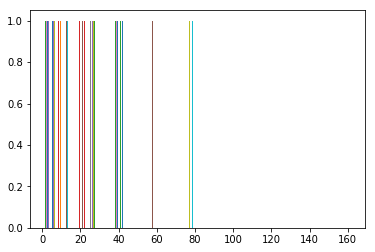

In [23]:
plt.hist(df['Burglary rate'])
plt.show()

Larceny theft rate std:  112.85487423595046
Larceny theft rate mean:  155.75558424835256


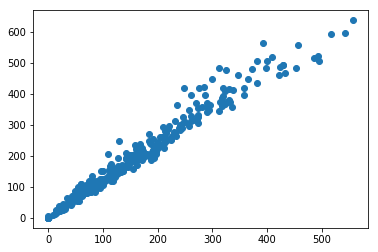

In [24]:
plt.scatter(df['Larceny theft rate'], df['Property crime rate'])
plt.show

print('Larceny theft rate std: ', df['Larceny theft rate'].std())

print('Larceny theft rate mean: ', df['Larceny theft rate'].mean())

Motor vehicle theft rate std:  5.8769323069335675
Motor vehicle theft rate mean:  4.56197234767056


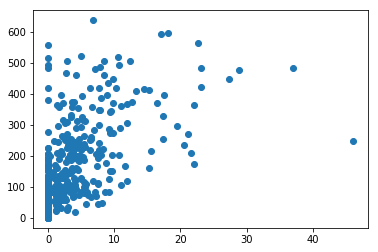

In [25]:
plt.scatter(df['Motor vehicle theft rate'], df['Property crime rate'])
plt.show

print('Motor vehicle theft rate std: ', df['Motor vehicle theft rate'].std())

print('Motor vehicle theft rate mean: ', df['Motor vehicle theft rate'].mean())

In [26]:
Y_train = df['Property crime rate']
X_train = df[['Murder and nonnegligent manslaughter rate','Robbery rate', 'Burglary rate',
           'Larceny theft rate', 'Motor vehicle theft rate']]

In [27]:
Y1 = Oregon_df['Property crime rate']
X1 = Oregon_df[['Murder and nonnegligent manslaughter rate', 'Robbery rate', 'Burglary rate',
           'Larceny theft rate', 'Motor vehicle theft rate']]

In [28]:
X_train

,Murder and nonnegligent manslaughter rate,Robbery rate,Burglary rate,Larceny theft rate,Motor vehicle theft rate
4,0.000,0.000,10.747,53.735,0.000
5,0.000,0.000,11.641,77.610,3.880
6,0.000,0.000,3.514,52.706,0.000
7,8.167,23.174,71.971,331.067,14.496
8,0.000,6.262,82.968,258.297,7.827
9,0.000,7.337,24.456,88.041,0.000
10,0.000,0.000,0.000,56.148,0.000
11,0.845,2.621,17.245,159.092,2.705
12,0.000,4.202,16.808,197.500,6.303
13,0.000,6.600,54.449,160.048,8.250


In [29]:
#df['Arson 3 rate'].isna().value_counts()

In [30]:
#Scale the selected features
X_train = StandardScaler().fit_transform(X_train)

In [31]:
X1 = StandardScaler().fit_transform(X1)

In [32]:
## Instantiate and fit the training model.
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
## Instantiate and fit the training model.
regr_train = linear_model.LinearRegression()
regr_train.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# Inspect the results
print('\nTraining Model Inspection Results:')
print('\nCoefficients: \n', regr_train.coef_)
print('\nIntercept: \n', regr_train.intercept_)
print('\nR-squared:', regr_train.score(X_train, Y_train))


Training Model Inspection Results:

Coefficients: 
 [-3.38135203e-14 -3.55271368e-14  2.79912375e+01  1.12691671e+02
  5.86843348e+00]

Intercept: 
 191.87432592646653

R-squared: 1.0


In [35]:
# Inspect the results.  The Oregon data is my test set.
print('\nTest Model Inspection Results:')
print('\nCoefficients: \n', regr_train.coef_)
print('\nIntercept: \n', regr_train.intercept_)
print('\nR-squared:', regr_train.score(X1, Y1))


Test Model Inspection Results:

Coefficients: 
 [-3.38135203e-14 -3.55271368e-14  2.79912375e+01  1.12691671e+02
  5.86843348e+00]

Intercept: 
 191.87432592646653

R-squared: 0.574092431372528


In [36]:
Y_train_pred = regr_train.predict(X_train)
print('\nTraining Model Predition Standard Deviation:', Y_train_pred.std())


Training Model Predition Standard Deviation: 135.01822481841577


In [37]:
Y1_pred = regr_train.predict(X1)
print('\nTest Model Predition Standard Deviation:', Y1_pred.std())


Test Model Predition Standard Deviation: 136.47158468754915


## This is a more elegant solution for converting df['Robbery'] to a series of binary values:

df['Robbery binary'] = df['Robbery'].apply(lambda x: 1 if x > 0 else 0)

# K Nearest Neighbors Regression Model

In [42]:
#When you apply a mathematical operation to an array, it applies the operation to all elements in the array
def isd(a):
    #use sklearn to mask cases in which the input data point turns out to be located exactly on top of 
    #the existing data point, resulting in zero.
    return 1 / a**2

In [43]:
#Note: Weight by inverse distance square reduces the impotance of points that are outliers.
#Remember I am just dealing with distance. 

In [60]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=3, weights='uniform')
#X = pd.DataFrame(a)

#My features:
#X_train and Y_train

knn_w.fit(X_train, Y_train)

# Set up our prediction line.
#I need to comment out all of the graphing code below, because this graphing assums that I have only two input feature 
#(i.e. an two dimensional object).
#However, because I am now using three features, I am working with a three dimensional object.
#T is only one column of numbers. However, X is two columns, loudness and duration, so I cannot use T.
#T = np.arange(0, 50, 0.01)[:,np.newaxis]

#Y_ = knn_w.predict(T)

Y_train_pred = knn_w.predict(X_train)

#graphing code commented out, due two the use of a three dimensional object, i.e. working with three features. 
#plt.scatter(X, Y, c='k', label='data')
#plt.plot(T, Y_, c='g', label='prediction')
#plt.legend()
#plt.title('K=10, Weighted')
#plt.show()



In [54]:
# OLS Cross Validation
#larceny fits property crime very well.  This is causeing the 1. values below.  Change print labels.

from sklearn.model_selection import cross_val_score
#score = cross_val_score(knn_w, X_train, Y_train, cv=10)
#print('score', score)
#print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
OLS_score_w = cross_val_score(regr_train, X_train, Y_train, cv=10)
print('OLS score_w', OLS_score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (OLS_score_w.mean(), OLS_score_w.std() * 2))
print(score_w)

OLS score_w [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Weighted Accuracy: 1.00 (+/- 0.00)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [57]:
from sklearn.model_selection import cross_val_score
#score = cross_val_score(knn_w, X_train, Y_train, cv=10)
#print('score', score)
#print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_train, Y_train, cv=10)
print('KNN score_w', score_w)
print("KNN Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
print(score_w)

KNN score_w [0.96191738 0.98619053 0.9642363  0.98021342 0.90539652 0.97933685
 0.95201978 0.93900403 0.93417168 0.93834034]
KNN Weighted Accuracy: 0.95 (+/- 0.05)
[0.96191738 0.98619053 0.9642363  0.98021342 0.90539652 0.97933685
 0.95201978 0.93900403 0.93417168 0.93834034]


In [49]:
# Inspect the results
print('\nTraining Model Inspection Results:')
#print('\nCoefficients: \n', knn_w.coef_)
#print('\nIntercept: \n', knn_w.intercept_)
print('\nR-squared:', knn_w.score(X_train, Y_train))


Training Model Inspection Results:

R-squared: 0.9745979715832597


In [50]:
print(knn_w.score(X1, Y1))

0.4524628416457904
